# Aircraft Risk Analysis

## Overview

This project uses data cleaning, imputation, analysis, and visualization to generate insights for the company, which aims to expand into new industries.

## Business Problem

The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Data Understanding

In the data folder is the 'AviationData.csv' file, a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Additionally, there is a 'USState_Codes.csv' file, which has two columns, one having the various states in the USA, and the second column having the corresponding abbreviations used for each state.

In [67]:
# Importing the necessary libraries to be used in the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Reading the datasets into pandas DataFrames
# We use the argument encoding='latin-1' because some bytes can't be decoded in 'utf-8'
# To avoid that error, we use the encoding='latin-1' argument
aviation_data = pd.read_csv('data/AviationData.csv', encoding='latin-1')
state_codes = pd.read_csv('data/USState_Codes.csv')
# We get a warning that some columns have mixed types but we'll take care of that later in Data cleaning

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1598760940.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('data/AviationData.csv', encoding='latin-1')


In [69]:
# Getting an overview of the data, incuding the non-null values in the columns
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [70]:
# Summary of the state codes dataset
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Aviation Data

The Aviation dataset includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Among the columns is the event ID, the country where it took place, aircraft model, number of injuries etc.

In [71]:
# Viewing the first 5 rows of the dataset
aviation_data.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### US State Codes Data

The US State Codes data has the USA states listed in one column, and the corresponding abbreviations for the states listed in the other column.

In [72]:
# Viewing the first five rows of the US State codes data.
state_codes.head(5)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Summary of unique values in the categorical columns

In [ ]:
# List of non-numeric columns
non_numeric_columns = [
    'investigation_type', 'event_date', 'location', 'country', 
    'injury_severity', 'aircraft_damage', 'aircraft_category', 
    'make', 'model', 'amateur_built', 'engine_type', 
    'purpose_of_flight', 'weather_condition', 'broad_phase_of_flight'
]

# Display unique values for each non-numeric column
for column in non_numeric_columns:
    print(f"Unique values in {column} - {aviation_data[column].nunique()} values:")
    print(aviation_data[column].unique())
    print("\n")


## Data Preparation

I am mostly interested in getting the data from the incidents that occurred in the USA, analyzing the states in which they occurred, the periods, and the broad phase of flight for my analysis.

### Data Cleaning

For the Aviation dataset, I make it easier to work with by normalizing columns names and dropping unnecessary columns
The columns include those that I will not be needing in my analysis, and others like longitude and latitude which have an insane number of missing values.

In [73]:
# Making columns easier to use
aviation_data.columns = aviation_data.columns.str.lower().str.replace('.', '_', regex=False)

# Dropping unnecessary columns
aviation_data.drop(columns=[
    'event_id', 'accident_number', 'latitude', 'longitude', 
    'airport_code', 'airport_name', 'registration_number', 
    'far_description', 'schedule', 'air_carrier', 
    'report_status', 'publication_date'
], inplace=True)

# Confirming if the columns have actually been dropped
aviation_data.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'aircraft_category', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [74]:
# Getting the number of null values in the columns
aviation_data.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

###### Handling values in the aircraft_category column

More than half of the records are null (56602) as seen above. 
The value_counts() function can give a further breakdown on the distribution of the values:

In [75]:
# Using value_counts() function to see the distribution of the values
aviation_data['aircraft_category'].value_counts()

aircraft_category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

Some categories are rare or synonymous, so I will:

Merge "Unknown" and "UNK" into a single category.
Merge "Ultralight" and "ULTR" since they might represent similar aircraft types.

This simplifies the data and reduces noise.

In [76]:
# Merging the synonymous categories
aviation_data['aircraft_category'] = aviation_data['aircraft_category'].replace({'UNK': 'Unknown', 'ULTR': 'Ultralight'})

I will impute Null Values with "Unknown"
Why: Since aircraft_category is missing in a large portion of the data, filling it with "Unknown" avoids discarding valuable rows while retaining its neutral meaning.
Rationale: This keeps our dataset complete for analysis without introducing bias.

In [77]:
# Imputing null values with unknown
aviation_data['aircraft_category'].fillna('Unknown', inplace=True)

In [78]:
# Using value_counts() to see how the data looks after implementing the changes
aviation_data['aircraft_category'].value_counts()

aircraft_category
Unknown              56618
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              31
WSFT                     9
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: count, dtype: int64

In [79]:
# Filling missing data in the 'location' column with 'Unknown'
aviation_data['location'].fillna('Unknown', inplace=True)

# Impute missing country values with unknown
aviation_data['country'].fillna('Unknown', inplace=True)

In [80]:
# using value_counts() function to see the distribution of values in the engine_type column
aviation_data['engine_type'].value_counts()

engine_type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [ ]:
# Getting the two columns to see that mapping
aviation_data[['injury_severity','total_fatal_injuries', 'total_minor_injuries']]

In [ ]:
# Extract the number and convert it to a Series
extracted_fatalities = aviation_data['injury_severity'].str.extract(r'Fatal\((\d+)\)')[0].astype(float)

# Fill missing values in total_fatal_injuries with the extracted numbers
aviation_data['total_fatal_injuries'].fillna(extracted_fatalities, inplace=True)

# Fill remaining NaN values with 0 for cases like 'Minor' or null injury_severity
aviation_data['total_fatal_injuries'].fillna(0, inplace=True)

In [ ]:
# Confirm the mapping is in place 
aviation_data[['injury_severity', 'total_fatal_injuries']].head(20)

Some columns are critical for the analysis I want to do, so for some cases I will drop rows with null values in the critical columns. 
For others like engine_type and numer_of_engines, I will fill them with their mode

In [106]:
# Dropping rows with null values in critical columns
aviation_data.dropna(subset=['injury_severity', 'aircraft_damage', 'make', 'model', 'total_fatal_injuries'], inplace=True)

# Filling 'amateur_built', 'number_of_engines', and 'engine_type' with their mode
for column in ['amateur_built', 'number_of_engines', 'engine_type']:
    mode_value = aviation_data[column].mode()[0]
    aviation_data[column].fillna(mode_value, inplace=True)

# Check remaining nulls in key columns after the changes
aviation_data[['location', 'country', 'injury_severity', 'total_fatal_injuries', 'aircraft_damage', 
               'make', 'model', 'amateur_built', 'number_of_engines', 
               'engine_type']].isna().sum()

location                0
country                 0
injury_severity         0
total_fatal_injuries    0
aircraft_damage         0
make                    0
model                   0
amateur_built           0
number_of_engines       0
engine_type             0
dtype: int64

In [107]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85121 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      85121 non-null  object 
 1   event_date              85121 non-null  object 
 2   location                85121 non-null  object 
 3   country                 85121 non-null  object 
 4   injury_severity         85121 non-null  object 
 5   aircraft_damage         85121 non-null  object 
 6   aircraft_category       85121 non-null  object 
 7   make                    85121 non-null  object 
 8   model                   85121 non-null  object 
 9   amateur_built           85121 non-null  object 
 10  number_of_engines       85121 non-null  float64
 11  engine_type             85121 non-null  object 
 12  purpose_of_flight       81038 non-null  object 
 13  total_fatal_injuries    85121 non-null  float64
 14  total_serious_injuries  72953 non-null  flo

In [112]:
# Ensure we drop rows where all three columns are null, while keeping index alignment
aviation_data = aviation_data.loc[
    aviation_data[['total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].notnull().any(axis=1)
]

# Check the updated row count
print(f"Updated number of rows: {aviation_data.shape[0]}")


Updated number of rows: 82530


In [114]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       78733 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  72953 non-null  flo

### Dealing with null values in the injuries columns

We will be filling the missing values based on a grouped average, for the 'make' column.
To further that the method will not significantly affect my data, we will be printing the mean before and after imputation

In [115]:
# Calculate the mean before imputation (using only non-null values)
mean_before_serious = aviation_data['total_serious_injuries'].mean()
mean_before_minor = aviation_data['total_minor_injuries'].mean()
mean_before_uninjured = aviation_data['total_uninjured'].mean()

# Fill missing values using group-based means
aviation_data['total_serious_injuries'].fillna(aviation_data.groupby('make')['total_serious_injuries'].transform('mean'), inplace=True)
aviation_data['total_minor_injuries'].fillna(aviation_data.groupby('make')['total_minor_injuries'].transform('mean'), inplace=True)
aviation_data['total_uninjured'].fillna(aviation_data.groupby('make')['total_uninjured'].transform('mean'), inplace=True)

# Calculate the mean after imputation
mean_after_serious = aviation_data['total_serious_injuries'].mean()
mean_after_minor = aviation_data['total_minor_injuries'].mean()
mean_after_uninjured = aviation_data['total_uninjured'].mean()

# Print the comparison of means before and after imputation
print(f"Mean of total_serious_injuries before imputation: {mean_before_serious}")
print(f"Mean of total_serious_injuries after imputation: {mean_after_serious}")
print(f"Mean of total_minor_injuries before imputation: {mean_before_minor}")
print(f"Mean of total_minor_injuries after imputation: {mean_after_minor}")
print(f"Mean of total_uninjured before imputation: {mean_before_uninjured}")
print(f"Mean of total_uninjured after imputation: {mean_after_uninjured}")

Mean of total_serious_injuries before imputation: 0.2732032952722986
Mean of total_serious_injuries after imputation: 0.2757252462053354
Mean of total_minor_injuries before imputation: 0.34992261953245907
Mean of total_minor_injuries after imputation: 0.36410996879384416
Mean of total_uninjured before imputation: 3.457205531952446
Mean of total_uninjured after imputation: 3.4293180652529123


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1302985145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['total_serious_injuries'].fillna(aviation_data.groupby('make')['total_serious_injuries'].transform('mean'), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1302985145.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['total_minor_injuries'].fillna(aviation_data.groupby('make')['total_minor_injuries'].transform('mean'), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1302985145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

###### Dealing with the 'purpose_of_flight'  null values

In [66]:
# Seeing how the values are distributed
aviation_data['purpose_of_flight'].value_counts().head(20)

purpose_of_flight
Personal                     49049
Instructional                10520
Unknown                       5954
Aerial Application            4695
Business                      3923
Positioning                   1602
Other Work Use                1207
Ferry                          805
Aerial Observation             773
Public Aircraft                707
Executive/corporate            525
Flight Test                    392
Skydiving                      178
External Load                  115
Public Aircraft - Federal      102
Banner Tow                     101
Air Race show                   90
Public Aircraft - Local         70
Public Aircraft - State         61
Air Race/show                   56
Name: count, dtype: int64

From the above, we can see that:

The most frequent value is Personal (49,049), followed by Instructional and Unknown.
These top three categories make up a significant portion of the dataset.
Some categories have very few entries.
Presence of “Unknown”, indicates an existing category for flights with unidentified purposes.
The best approach here is to impute missing values with "Unknown"
Why: The dataset already uses "Unknown" to categorize flights with an unspecified purpose.

Benefits:
Retains the rows for analysis and avoids introducing bias by favoring any frequent category.  
Imputing it with the mode (Personal) in this case would skew the data towards Personal.

In [14]:
aviation_data['make'].value_counts().head(45)

make
Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                       

engine_type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

location             0
country              0
injury_severity      0
aircraft_damage      0
make                 0
model                0
amateur_built        0
number_of_engines    0
engine_type          0
dtype: int64

In [116]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       78733 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  81740 non-null  flo

In [117]:
# Filling null values in 'purpose_of_flight' column with 'Unknown'
aviation_data['purpose_of_flight'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\884291403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['purpose_of_flight'].fillna('Unknown', inplace=True)


In [118]:
aviation_data['broad_phase_of_flight'].value_counts().head(25)

broad_phase_of_flight
Landing        15143
Takeoff        12024
Cruise          9481
Maneuvering     7488
Approach        6127
Taxi            1858
Climb           1811
Descent         1640
Go-around       1296
Standing         743
Unknown          488
Other            109
Name: count, dtype: int64

### Dealing with values in the weather_condition column

In [120]:
aviation_data['weather_condition'].value_counts()

weather_condition
VMC        73714
IMC         5228
Unknown     3588
Name: count, dtype: int64

In [119]:
# Standardize "UNK" and "Unk" to "Unknown"
aviation_data['weather_condition'].replace(['UNK', 'Unk'], 'Unknown', inplace=True)

# Impute missing values with "Unknown"
aviation_data['weather_condition'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3212304301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['weather_condition'].replace(['UNK', 'Unk'], 'Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3212304301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['weather_condition'].fillna('Unknown', inplace=True)


In [121]:
# Impute missing values with 'Unknown'
aviation_data['broad_phase_of_flight'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\218280043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['broad_phase_of_flight'].fillna('Unknown', inplace=True)


In [123]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       82530 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  81740 non-null  flo

In [124]:
# Filling the little remaining null values with 0
aviation_data.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\2270998105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data.fillna(0, inplace=True)


Dealing with the country column

In [128]:
# Update the mapping dictionary to use "Ivory Coast"
country_mapping = {
    'United States': 'USA',
    'Unknown': 'Not Specified',
    'MISSING': 'Not Specified',
    'GULF OF MEXICO': 'Other',
    'PACIFIC OCEAN': 'Other',
    'ATLANTIC OCEAN': 'Other',
    'Saint Vincent and the Grenadines': 'St Vincent And The Grenadines',
    'Ivory Coast': 'Ivory Coast',
    'Côte d\'Ivoire': 'Ivory Coast',
    "Cote D'ivoire": 'Ivory Coast',
    'South Korean': 'South Korea',
    'Republic of North Macedonia': 'North Macedonia',
    'Antigua And Barbuda': 'Antigua and Barbuda'
}

# Apply the updated mapping
aviation_data['country'] = aviation_data['country'].replace(country_mapping)

# Check the unique values after standardization
print(aviation_data['country'].value_counts().head(10))

country
USA               78158
Brazil              304
Canada              255
Mexico              241
Not Specified       230
Bahamas             188
United Kingdom      177
Australia           158
France              144
Spain               139
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\4208598510.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['country'] = aviation_data['country'].replace(country_mapping)


In [125]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82530 entries, 0 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   investigation_type      82530 non-null  object 
 1   event_date              82530 non-null  object 
 2   location                82530 non-null  object 
 3   country                 82530 non-null  object 
 4   injury_severity         82530 non-null  object 
 5   aircraft_damage         82530 non-null  object 
 6   aircraft_category       82530 non-null  object 
 7   make                    82530 non-null  object 
 8   model                   82530 non-null  object 
 9   amateur_built           82530 non-null  object 
 10  number_of_engines       82530 non-null  float64
 11  engine_type             82530 non-null  object 
 12  purpose_of_flight       82530 non-null  object 
 13  total_fatal_injuries    82530 non-null  float64
 14  total_serious_injuries  82530 non-null  flo

## Feature Engineering

Manipulating the event_date in order to get the month and the year

In [126]:
# Step 1: Convert event_date to datetime
aviation_data['event_date'] = pd.to_datetime(aviation_data['event_date'])

# Step 2: Extract year and month
aviation_data['year'] = aviation_data['event_date'].dt.year
aviation_data['month'] = aviation_data['event_date'].dt.month

# Display the updated DataFrame to check the new columns
print(aviation_data[['event_date', 'year', 'month']].tail(20))

      event_date  year  month
88842 2022-12-04  2022     12
88843 2022-12-04  2022     12
88844 2022-12-04  2022     12
88845 2022-12-05  2022     12
88846 2022-12-05  2022     12
88847 2022-12-05  2022     12
88848 2022-12-05  2022     12
88854 2022-12-07  2022     12
88856 2022-12-08  2022     12
88857 2022-12-08  2022     12
88858 2022-12-09  2022     12
88859 2022-12-09  2022     12
88861 2022-12-10  2022     12
88865 2022-12-12  2022     12
88867 2022-12-12  2022     12
88869 2022-12-13  2022     12
88873 2022-12-14  2022     12
88876 2022-12-15  2022     12
88877 2022-12-16  2022     12
88886 2022-12-26  2022     12


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3672542474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['event_date'] = pd.to_datetime(aviation_data['event_date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3672542474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['year'] = aviation_data['event_date'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3672542474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [127]:
# Extract month names using strftime
# aviation_data['month_name'] = aviation_data['event_date'].dt.strftime('%b')  # Abbreviated month name (e.g., Jan, Feb)
aviation_data['month_name'] = aviation_data['event_date'].dt.strftime('%B')  # Full month name (e.g., January, February)

# Display the updated DataFrame
print(aviation_data[['month', 'month_name']].head(20))

    month month_name
0      10    October
1       7       July
3       6       June
4       8     August
5       9  September
6       8     August
7       1    January
8       1    January
9       1    January
10      1    January
11      1    January
12      1    January
13      1    January
14      1    January
15      1    January
16      1    January
17      1    January
18      1    January
19      1    January
20      1    January


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3235827038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['month_name'] = aviation_data['event_date'].dt.strftime('%B')  # Full month name (e.g., January, February)


In [129]:
# Dropping the injury severity column because we already have columns like total_fatal_injuries
aviation_data.drop('injury_severity', axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3647374130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data.drop('injury_severity', axis=1, inplace=True)


In [130]:
aviation_data['aircraft_damage'].value_counts()

aircraft_damage
Substantial    63243
Destroyed      16684
Minor           2511
Unknown           92
Name: count, dtype: int64

In [131]:
# Drop rows with "Unknown" in the 'aircraft_damage' column
aviation_data = aviation_data[aviation_data['aircraft_damage'] != 'Unknown']

# Verify the changes
print(aviation_data['aircraft_damage'].value_counts())

aircraft_damage
Substantial    63243
Destroyed      16684
Minor           2511
Name: count, dtype: int64


In [132]:
# Create a DataFrame with rows where 'aircraft_category' is not 'Unknown'
known_aircraft_data = aviation_data[aviation_data['aircraft_category'] != 'Unknown']

# Create a DataFrame with rows where 'aircraft_category' is 'Unknown'
unknown_aircraft_data = aviation_data[aviation_data['aircraft_category'] == 'Unknown']

In [133]:
# Standardize 'make' column: convert to title case and strip whitespaces
aviation_data['make'] = aviation_data['make'].str.title().str.strip()

# Check the unique values and the top 40 after standardization
print(aviation_data['make'].value_counts().iloc[0:10])

make
Cessna      26181
Piper       14282
Beech        5021
Bell         2563
Boeing       1348
Mooney       1270
Grumman      1150
Robinson     1121
Bellanca     1022
Hughes        906
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\1857767596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['make'] = aviation_data['make'].str.title().str.strip()


### Getting the incidents from the USA

Now I can get the incidents which happened in the USA, and also the specific state where it took place, from the location data.

In [135]:
# Filter for USA cases
usa_data = aviation_data[aviation_data['country'] == 'USA'].copy()
# Extract state abbreviation from location (assuming format 'City, State')
usa_data['state_abbr'] = usa_data['location'].str.split(',').str[-1].str.strip()

# Create a dictionary for mapping abbreviations to state names
state_mapping = dict(zip(state_codes['Abbreviation'], state_codes['US_State']))

# Add the full state name to the USA DataFrame
usa_data['state_name'] = usa_data['state_abbr'].map(state_mapping)
print(usa_data[['location', 'state_abbr', 'state_name']].head(10))

            location state_abbr     state_name
0    MOOSE CREEK, ID         ID          Idaho
1     BRIDGEPORT, CA         CA     California
3         EUREKA, CA         CA     California
4         Canton, OH         OH           Ohio
5         BOSTON, MA         MA  Massachusetts
6         COTTON, MN         MN      Minnesota
7        PULLMAN, WA         WA     Washington
8   EAST HANOVER, NJ         NJ     New Jersey
9   JACKSONVILLE, FL         FL        Florida
10         HOBBS, NM         NM     New Mexico


In [136]:
# Group by state_name and count the number of occurrences
state_case_counts = usa_data['state_name'].value_counts()

# Convert to a DataFrame for better readability
state_case_counts_df = state_case_counts.reset_index()
state_case_counts_df.columns = ['State', 'Case Count']

# Display the top states with the most cases
print(state_case_counts_df.head(10))

        State  Case Count
0  California        8408
1       Texas        5643
2      Alaska        5541
3     Florida        5521
4     Arizona        2699
5    Colorado        2532
6  Washington        2504
7    Michigan        1934
8     Georgia        1887
9    Illinois        1883


In [139]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78108 entries, 0 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      78108 non-null  object        
 1   event_date              78108 non-null  datetime64[ns]
 2   location                78108 non-null  object        
 3   country                 78108 non-null  object        
 4   aircraft_damage         78108 non-null  object        
 5   aircraft_category       78108 non-null  object        
 6   make                    78108 non-null  object        
 7   model                   78108 non-null  object        
 8   amateur_built           78108 non-null  object        
 9   number_of_engines       78108 non-null  float64       
 10  engine_type             78108 non-null  object        
 11  purpose_of_flight       78108 non-null  object        
 12  total_fatal_injuries    78108 non-null  float64    

From the above, we can see that only the state_name column has some null values. We can drop the null values in the usa_data now.

In [140]:
# Dropping null records and saving the data as df_usa
df_usa = usa_data.dropna()
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78041 entries, 0 to 88886
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      78041 non-null  object        
 1   event_date              78041 non-null  datetime64[ns]
 2   location                78041 non-null  object        
 3   country                 78041 non-null  object        
 4   aircraft_damage         78041 non-null  object        
 5   aircraft_category       78041 non-null  object        
 6   make                    78041 non-null  object        
 7   model                   78041 non-null  object        
 8   amateur_built           78041 non-null  object        
 9   number_of_engines       78041 non-null  float64       
 10  engine_type             78041 non-null  object        
 11  purpose_of_flight       78041 non-null  object        
 12  total_fatal_injuries    78041 non-null  float64    

We can drop the 'month' and 'state_abbr' columns as we've already done feature engineering with them and they are no longer useful.

In [141]:
# Drop 'month' and 'state_abbr' columns from df_usa
df_usa.drop(columns=['month', 'state_abbr'], inplace=True)

# Verify the changes
print(df_usa.columns)

Index(['investigation_type', 'event_date', 'location', 'country',
       'aircraft_damage', 'aircraft_category', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'year', 'month_name', 'state_name'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3052871411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=['month', 'state_abbr'], inplace=True)


In [144]:
df_usa.drop(columns=['investigation_type', 'event_date', 'location', 'country'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\357065407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=['investigation_type', 'event_date', 'location', 'country'], inplace=True)


In [145]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78041 entries, 0 to 88886
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aircraft_damage         78041 non-null  object 
 1   aircraft_category       78041 non-null  object 
 2   make                    78041 non-null  object 
 3   model                   78041 non-null  object 
 4   amateur_built           78041 non-null  object 
 5   number_of_engines       78041 non-null  float64
 6   engine_type             78041 non-null  object 
 7   purpose_of_flight       78041 non-null  object 
 8   total_fatal_injuries    78041 non-null  float64
 9   total_serious_injuries  78041 non-null  float64
 10  total_minor_injuries    78041 non-null  float64
 11  total_uninjured         78041 non-null  float64
 12  weather_condition       78041 non-null  object 
 13  broad_phase_of_flight   78041 non-null  object 
 14  year                    78041 non-null  int

In [146]:
df_usa.head(5)

,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year,month_name,state_name
0,Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.00000,0.00000,0.0,Unknown,Cruise,1948,October,Idaho
1,Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.00000,0.00000,0.0,Unknown,Unknown,1962,July,California
3,Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.00000,0.00000,0.0,IMC,Cruise,1977,June,California
4,Destroyed,Unknown,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.00000,0.32809,0.0,VMC,Approach,1979,August,Ohio
5,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Unknown,0.0,1.69708,1.00000,44.0,VMC,Climb,1979,September,Massachusetts


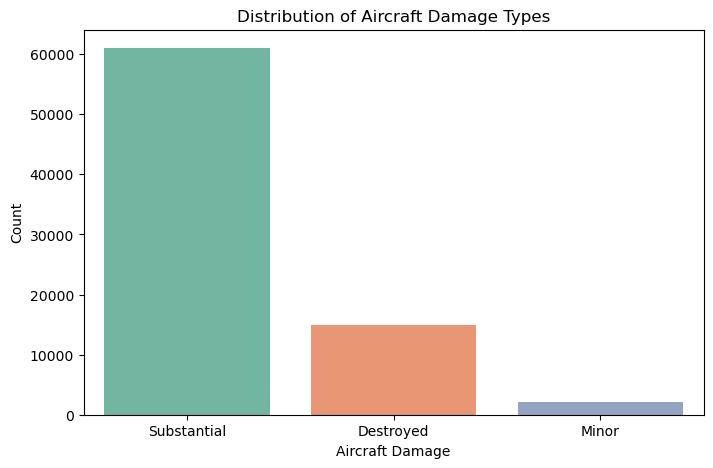

In [147]:
# Plot the count of different aircraft damages
plt.figure(figsize=(8, 5))
sns.countplot(data=df_usa, x='aircraft_damage', palette='Set2', order=df_usa['aircraft_damage'].value_counts().index)
plt.title('Distribution of Aircraft Damage Types')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.show()

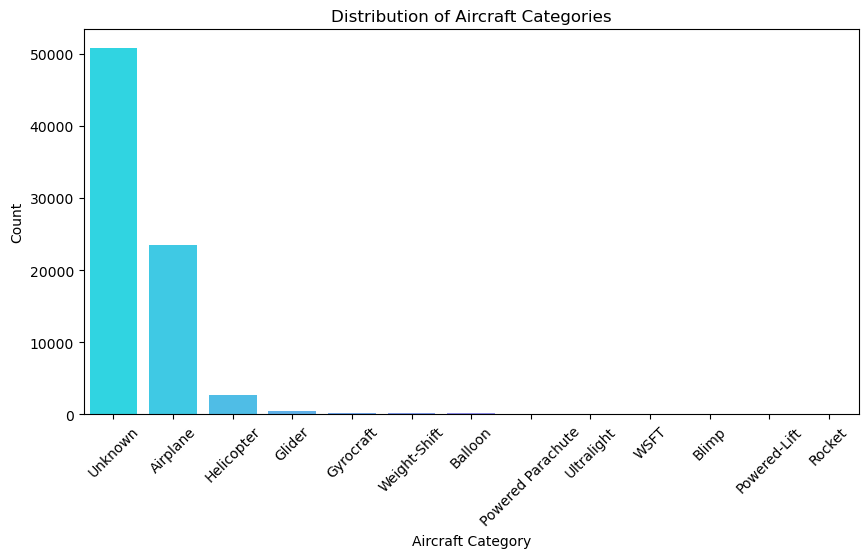

In [148]:
# Plot the distribution of aircraft categories
plt.figure(figsize=(10, 5))
sns.countplot(data=df_usa, x='aircraft_category', palette='cool', order=df_usa['aircraft_category'].value_counts().index)
plt.title('Distribution of Aircraft Categories')
plt.xticks(rotation=45)
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.show()

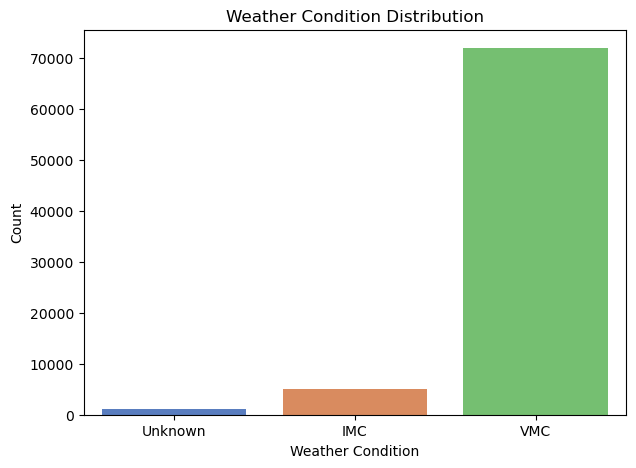

In [149]:
# Plot weather condition distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df_usa, x='weather_condition', palette='muted')
plt.title('Weather Condition Distribution')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


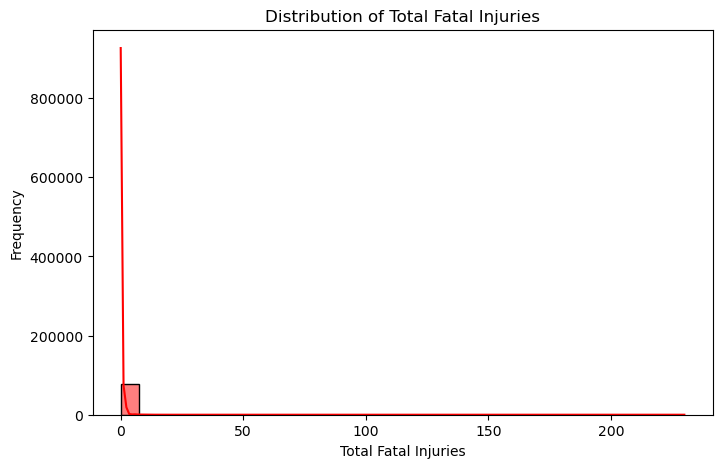

In [150]:
# Distribution plot for total_fatal_injuries
plt.figure(figsize=(8, 5))
sns.histplot(df_usa['total_fatal_injuries'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

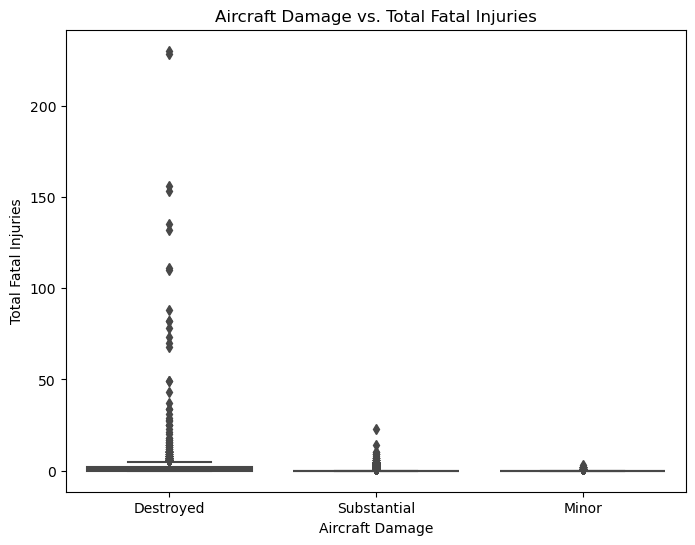

In [151]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_usa, x='aircraft_damage', y='total_fatal_injuries', palette='Set1')
plt.title('Aircraft Damage vs. Total Fatal Injuries')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.show()

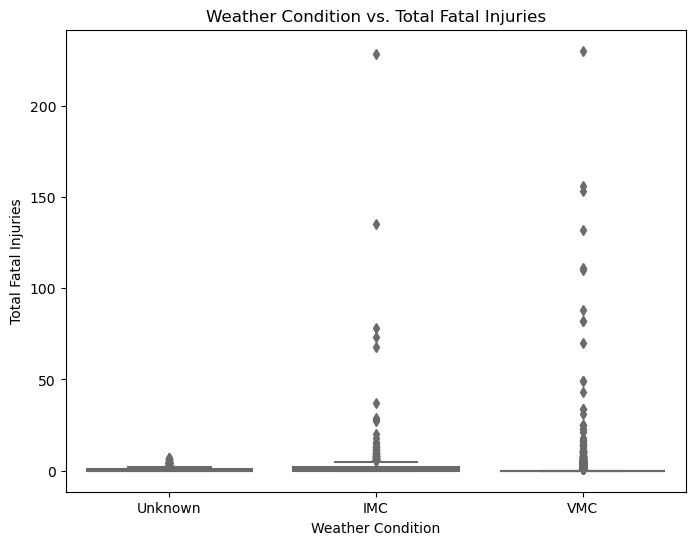

In [152]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_usa, x='weather_condition', y='total_fatal_injuries', palette='Set3')
plt.title('Weather Condition vs. Total Fatal Injuries')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.show()

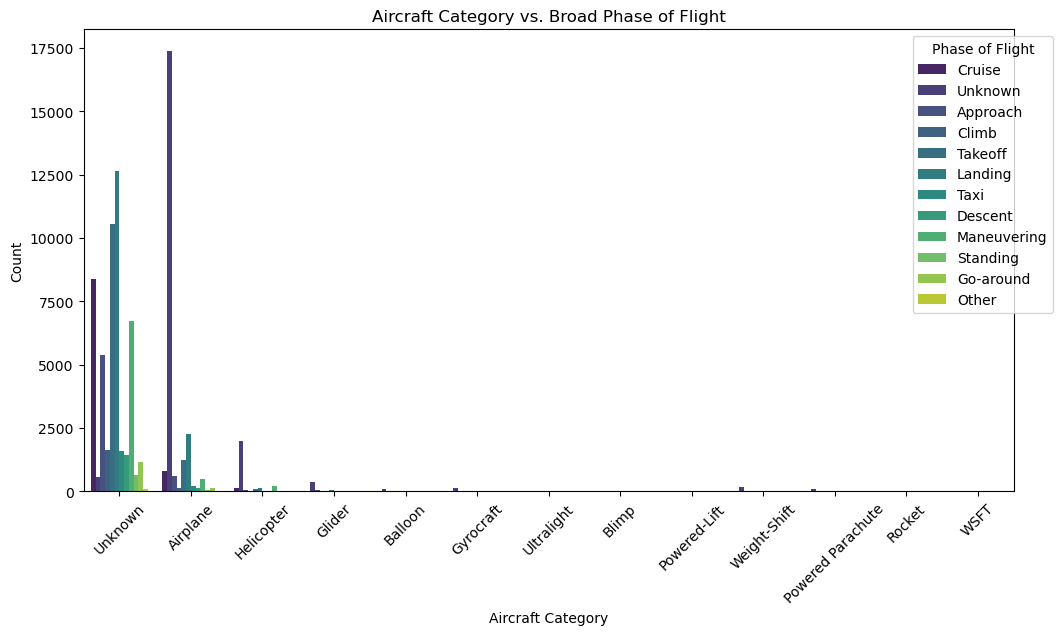

In [153]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_usa, x='aircraft_category', hue='broad_phase_of_flight', palette='viridis')
plt.title('Aircraft Category vs. Broad Phase of Flight')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Phase of Flight', bbox_to_anchor=(1.05, 1))
plt.show()

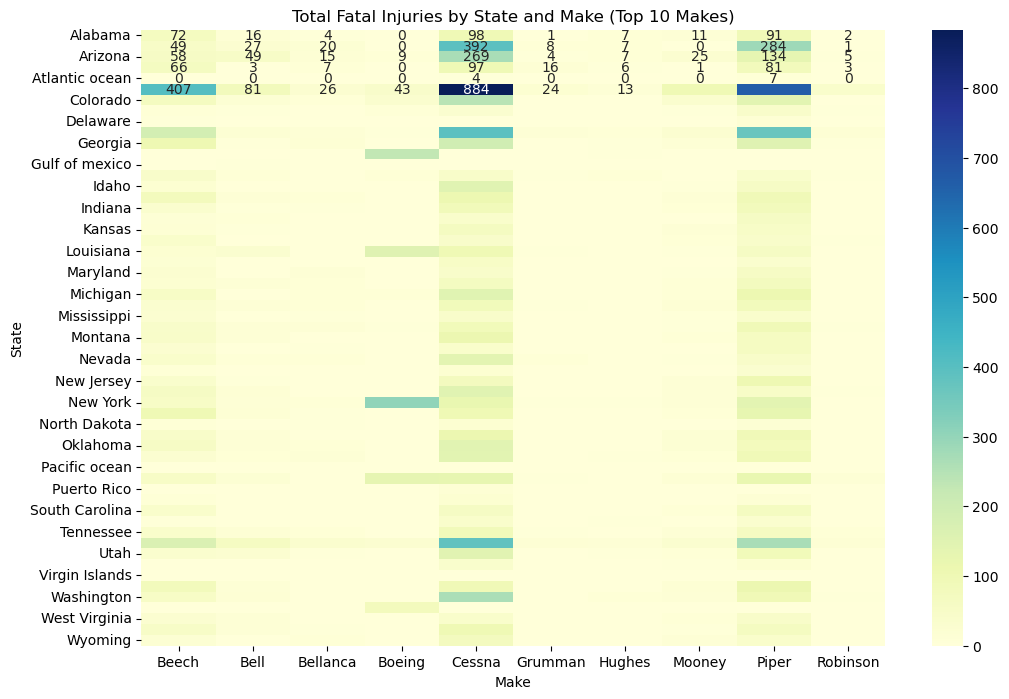

In [154]:
# Filter for top 10 makes
top_10_makes = df_usa['make'].value_counts().head(10).index
df_top_makes = df_usa[df_usa['make'].isin(top_10_makes)]

# Pivot table and heatmap
pivot_injuries = df_top_makes.pivot_table(values='total_fatal_injuries', index='state_name', columns='make', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_injuries, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Total Fatal Injuries by State and Make (Top 10 Makes)')
plt.xlabel('Make')
plt.ylabel('State')
plt.show()

In [ ]:
# Pairplot for injury data, categorized by aircraft category
sns.pairplot(df_usa, vars=['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'], hue='aircraft_category', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Injury Variables by Aircraft Category', y=1.02)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  